# kmeans clustering from scratch

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## k means clustering with random initialization

In [2]:
#helper function
#categorize the datas into certian clusters
def categ(clusters,datas):
    d={}
    for data in datas:
        corr_dist=float('inf')
        for i,cluster in enumerate(clusters):
            dist=np.linalg.norm(data-cluster)
            if dist<corr_dist:
                corr_dist=dist
                corr_cluster_i=i
        if corr_cluster_i in d:
            d[corr_cluster_i].append(data)
        else:
            d[corr_cluster_i]=[data]
    return d

In [3]:
def kmeans_c(datas,num_clusters):
    clusters=datas[np.random.choice(range(len(datas)),num_clusters,replace=False)]
    d=categ(clusters,datas)
    while True:
        new_clusters=[]
        s=0
        for key,value in d.items():
            new_cluster=np.mean(np.array(value),axis=0)
            new_clusters.append(new_cluster)
            s+=np.linalg.norm(clusters[key]-new_cluster)
        if s==0:
            return d
        else:
            clusters=new_clusters
            d=categ(clusters,datas)

## k means clustering with kmeans++ initialization

In [4]:
#kmeans++ initialization
def kmeans_init(datas,num_clusters):
    clusters=[]
    clusters.append(datas[np.random.choice(range(len(datas)))])
    for i_ in range(1,num_clusters):
        d=[]
        for data in datas:
            d.append(min([np.linalg.norm(data-clusters[j]) for j in range(i_)]))
        probas=np.array(d)/sum(d)
        clusters.append(datas[np.random.choice(range(len(datas)),p=probas)])
    return clusters

In [5]:
def kmeans_c_init(datas,num_clusters):
    clusters=kmeans_init(datas,num_clusters)
    d=categ(clusters,datas)
    while True:
        new_clusters=[]
        s=0
        for key,value in d.items():
            new_cluster=np.mean(np.array(value),axis=0)
            new_clusters.append(new_cluster)
            s+=np.linalg.norm(clusters[key]-new_cluster)
        if s==0:
            return d
        else:
            clusters=new_clusters
            d=categ(clusters,datas)

plots the 2D datas

In [6]:
def plot_kmeans_c(d):
    for key,value in d.items():
        value=np.array(value)
        plt.scatter(value[:,0],value[:,1])

## deploy the kmeans algorithm

In [7]:
from sklearn.datasets import make_blobs

In [8]:
#generate the datas
X, y = make_blobs(n_samples=10000, centers=5, cluster_std=0.5)

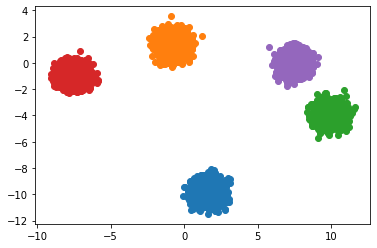

In [9]:
d=kmeans_c(X,5)
plot_kmeans_c(d)

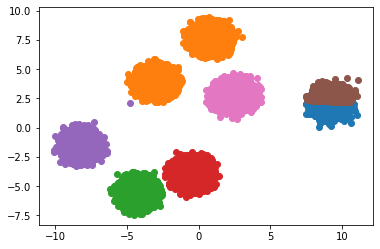

In [10]:
X, y = make_blobs(n_samples=90000, centers=7, cluster_std=0.5)
d=kmeans_c_init(X,7)
plot_kmeans_c(d)

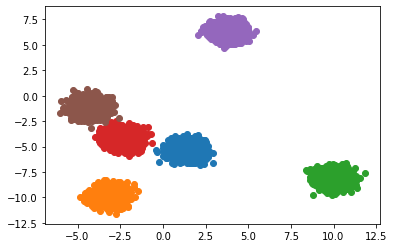

In [12]:
num_clusters=6
X, y = make_blobs(n_samples=9000, centers=num_clusters, cluster_std=0.5)
d=kmeans_c_init(X,num_clusters)
plot_kmeans_c(d)

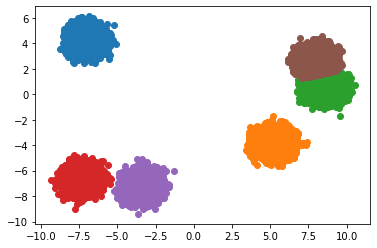

In [13]:
num_clusters=6
X, y = make_blobs(n_samples=60000, centers=num_clusters, cluster_std=0.5)
d=kmeans_c_init(X,num_clusters)
plot_kmeans_c(d)

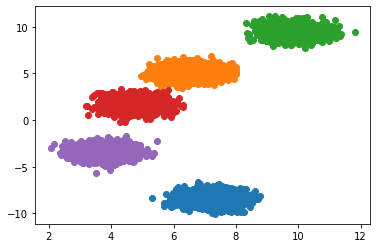

In [10]:
d=kmeans_c(X,5)
plot_kmeans_c(d)

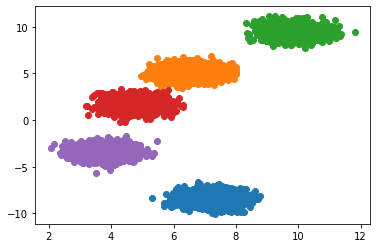

In [11]:
d=kmeans_c_init(X,5)
plot_kmeans_c(d)

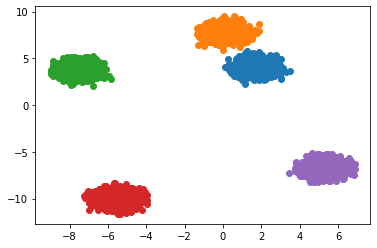

In [39]:
#generate the datas
X, y = make_blobs(n_samples=10000, centers=5, cluster_std=0.5)
d=kmeans_c_init(X,5)
plot_kmeans_c(d)

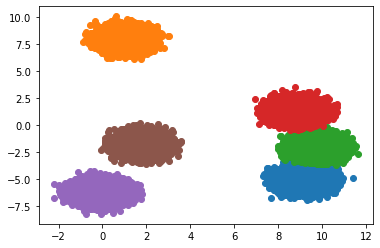

In [76]:
X, y = make_blobs(n_samples=90000, centers=6, cluster_std=0.5)
d=kmeans_c_init(X,6)
plot_kmeans_c(d)

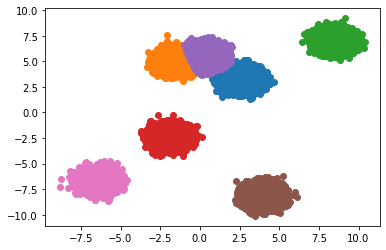

In [78]:
X, y = make_blobs(n_samples=90000, centers=7, cluster_std=0.5)
d=kmeans_c_init(X,7)
plot_kmeans_c(d)